## Welcome to ADA!

This class makes extensive use of some technology that you should have some familarity with: Python, GitHub, the Open AI API, and Google Big Query. This notebook walks you through some of these technologies to ensure everything is working.

In [13]:
import openai
from google.cloud import bigquery
import polars as pl
import pandas as pd
import plotnine as p9
from pprint import pprint

To install these libraries directly within your Jupyter Notebook, you can use the `!pip install` command. The exclamation mark (`!`) at the beginning allows you to run shell commands directly from the notebook's cells.

### Installation:

1. **Open a new cell in your Jupyter Notebook.**
2. **Type the following command and execute the cell:**

```
   !pip install openai google-cloud-bigquery polars
```

If there are other libraries you need you can do a separate `!pip install`.

## Test GBQ Connectivity

In order to work with our GBQ environment, I think you'll need to join our google group. You can do that by following this link: [https://groups.google.com/g/umt-msba-ada/](https://groups.google.com/g/umt-msba-ada/). 

Once you've done that, head to our GBQ environment and run the below queries. The environment can be found here: [https://console.cloud.google.com/bigquery?project=umt-msba&ws=!1m0](https://console.cloud.google.com/bigquery?project=umt-msba&ws=!1m0).

**Query 1**
```
SELECT year, month, ROUND(SUM(total_sales),2) AS sales 
FROM `umt-msba.dram_shop.vw_item_year_month` 
GROUP BY year, month
ORDER BY year, month
```

**Query 2**
```
SELECT    dd.department, 
                  d.dept_name, 
                  SUM(dd.spend) AS dept_spend
FROM `umt-msba.wedge_example.department_date` AS dd
INNER JOIN `umt-msba.wedge_example.departments` d ON d.department = dd.department
WHERE EXTRACT(YEAR FROM dd.date) = 2015
GROUP BY dd.department, d.dept_name
ORDER BY dept_spend DESC
```

**Query 3**
```
SELECT LOWER(description) AS product, ROUND(SUM(sales),2) AS sales
FROM `umt-msba.wedge_example.product_year_month`
WHERE dept_name = "PRODUCE"
GROUP BY product
ORDER BY sales DESC
LIMIT 20;
```

---

After you've run those queries and played around with them a bit in the GBQ console, we want to make sure you can run the same queries via code. The process of getting access can be a bit cumbersome, which is why we're doing it in class, but this has worked for me: 

1. Install the [Google Cloud Command Line Interface (CLI)](https://cloud.google.com/sdk/docs/install).
2. Follow the local development environment instructions [here](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev). 
3. Try the code below.


In [5]:
# Create a client object
client = bigquery.Client()

# Define the query
query_1 = """
  SELECT year, month, ROUND(SUM(total_sales),2) AS sales 
  FROM `umt-msba.dram_shop.vw_item_year_month` 
  GROUP BY year, month
  ORDER BY year, month
"""

# Run the query
query_job = client.query(query_1)

# Get the results
results = query_job.result()


In [6]:
year_month_sales = results.to_dataframe()
# I had to run `!pip install db-dtypes` to get this to work

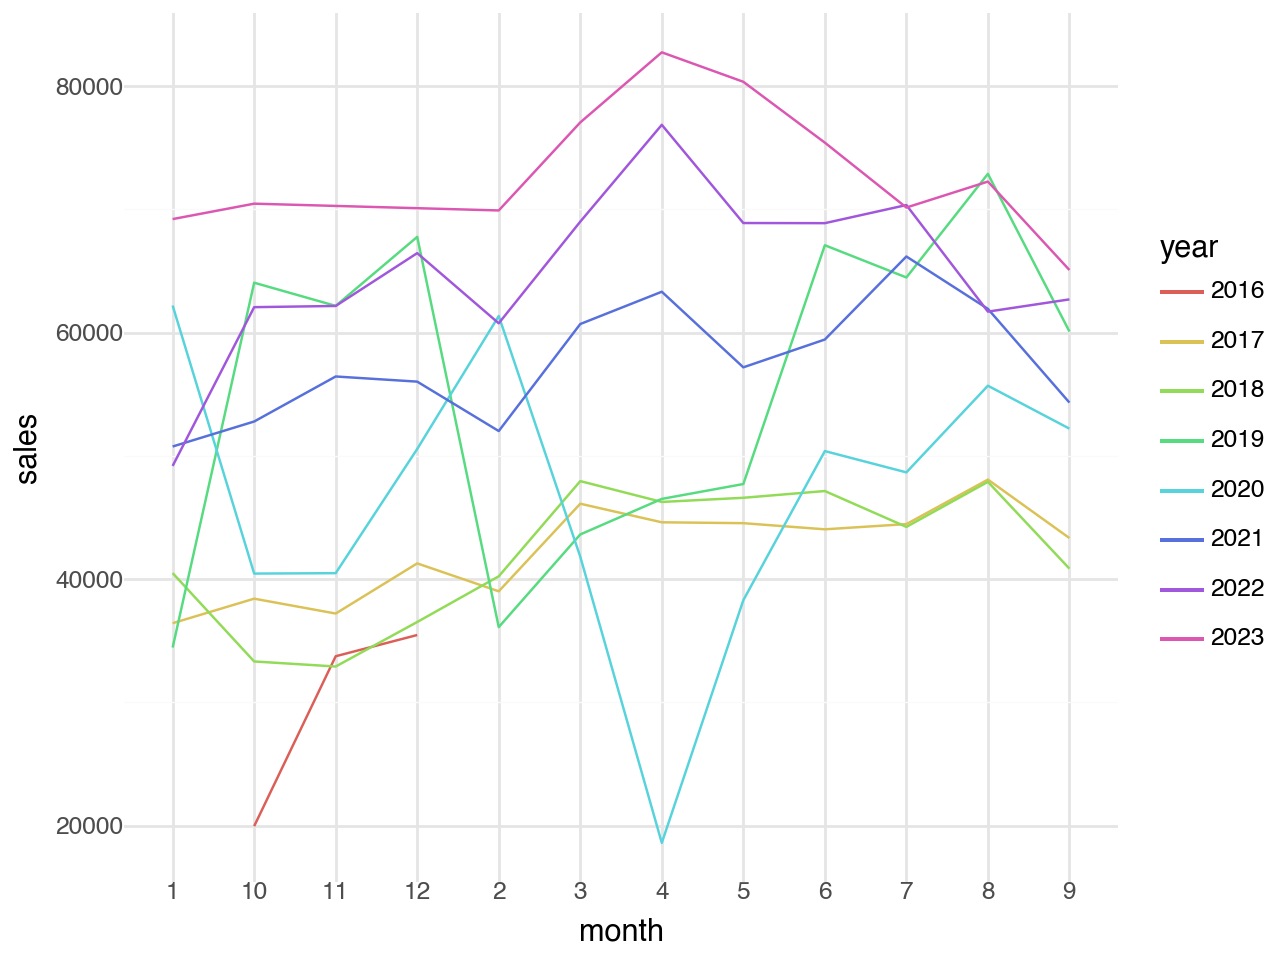

In [11]:

# Convert year and month columns to string
year_month_sales['year'] = year_month_sales['year'].astype(str)
year_month_sales['month'] = year_month_sales['month'].astype(str)

# Create the plot
plot = (
  p9.ggplot(year_month_sales, p9.aes(x='month', y='sales', color='year',group='year')) +
  p9.geom_line() +
#  p9.aes(group='year') +
  p9.theme_minimal()
)

# Display the plot
plot

If you get here before your classmates, make charts for queries 2 and 3.

## Testing Open AI API Access

As part of this class and in Text Mining, we'll be working with the [Open AI API](https://openai.com/index/openai-api/). Head over there and sign up for access. The [Developer Quickstart](https://platform.openai.com/docs/quickstart) explains how to create your API key and export it as an environment variable. 



In [12]:
client = openai.OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {
            "role": "user",
            "content": "Write a haiku about data engineering."
        }
    ]
)


ChatCompletionMessage(content='Streams of code align,  \nData flows like rivers vast,  \nInsights bloom in time.', refusal=None, role='assistant', function_call=None, tool_calls=None)


In [25]:
result = completion.choices[0].message.content
print("".join(result))

Streams of code align,  
Data flows like rivers vast,  
Insights bloom in time.


## Finishing your work

You accepted this exercise via Github Classroom. I'll evaluate your work via a similar mechanism, which means you need to commit and push your repo in order for me to see it. 

1. Save your file.
2. Go to the "Source Control" section of VS Code (upper left, looks like a network).
3. Add your file to your commit by hitting the plus sign.
4. Type a message in the text box. 
5. Hit commit. 